In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.logging.set_verbosity(tf.logging.ERROR)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [2]:
def train(ratio=0):
    tf.reset_default_graph()
    # 占位符 输入
    x_ = tf.placeholder(tf.float32, [None, 784], name='input')
    y_ = tf.placeholder(tf.float32, [None, 10], name='y_')
    keep_prob = tf.placeholder(tf.float32)
    
    x = tf.reshape(x_, [-1, 28, 28, 1])
    x = tf.layers.conv2d(x, filters=32, kernel_size=[5,5], 
                                  strides=(1,1), padding='same', 
                                  activation=tf.nn.relu, name='conv_relu_1')
    x = tf.layers.max_pooling2d(x, pool_size=[2,2],
                                        strides=2, name='max_pool_2x2_1')
    x = tf.layers.conv2d(x, filters=64, kernel_size=[5,5], 
                                  strides=(1,1), padding='same', 
                                  activation=tf.nn.relu, name='conv_relu_2')
    x = tf.layers.max_pooling2d(x, pool_size=[2,2],
                                        strides=2, name='max_pool_2x2_2')
    x = tf.reshape(x, [-1, 7*7*64], name='flat')
    x = tf.layers.dense(x, units=1024, activation=tf.nn.relu, name = 'dense_1')
    x = tf.layers.dropout(x, keep_prob)
    x = tf.layers.dense(x, units=10, activation=tf.nn.relu, name = 'dense_2')
    ce = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=x, 
                                                 name='cross_entropy')
    loss = tf.reduce_mean(ce)
    train_op = tf.train.AdamOptimizer(1e-4, name='Adam').minimize(loss)
    acc = tf.cast(tf.equal(tf.argmax(x, 1), tf.argmax(y_, 1)), tf.float32)
    acc = tf.reduce_mean(acc)
    
    loss_cur, ac_cur = [], []
    with tf.Session(config=config) as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(20000):
            batch = data.train.next_batch(100)
            if i % 50 == 0:
                acc_i, loss_i = sess.run([acc, loss], feed_dict={x_: data.test.images, y_: data.test.labels, keep_prob: 1.0})
                ac_cur.append(acc_i)
                loss_cur.append(loss_i)
            #if i % 400 == 0:
            #       print("step %d accuracy %g" % (i, acc_i))
            train_op.run(feed_dict={x_: batch[0], y_: batch[1], keep_prob: ratio})
        accuracy = acc.eval(feed_dict={x_: data.test.images, y_: data.test.labels, keep_prob: 1.0})
        print("test accuracy %g" % accuracy)
    losses.append(loss_cur)
    ac.append(ac_cur)

In [3]:
# 损失，准确率
losses, ac = [], []
data = input_data.read_data_sets('dataset/mnist/', one_hot=True)
for i in [1.0, 0.8, 0.6, 0.5, 0.5, 0.6, 0.8, 1]:
    train(i)

Extracting dataset/mnist/train-images-idx3-ubyte.gz
Extracting dataset/mnist/train-labels-idx1-ubyte.gz
Extracting dataset/mnist/t10k-images-idx3-ubyte.gz
Extracting dataset/mnist/t10k-labels-idx1-ubyte.gz
test accuracy 0.7499
test accuracy 0.9766
test accuracy 0.7902
test accuracy 0.8039
test accuracy 0.984
test accuracy 0.8597
test accuracy 0.9824
test accuracy 0.451


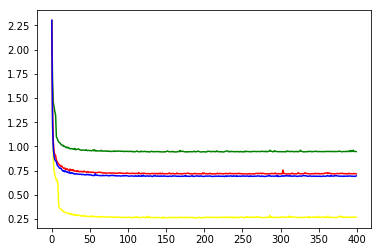

In [4]:
c = ['green', 'yellow', 'red', 'blue']
for i,coor in enumerate(losses[:4]):
    plt.plot(np.arange(len(coor)), coor, color=c[i])

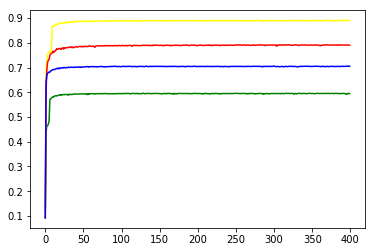

In [7]:
c = ['green', 'yellow', 'red', 'blue']
for i,coor in enumerate(ac[:4]):
    plt.plot(np.arange(len(coor)), coor, color=c[i])

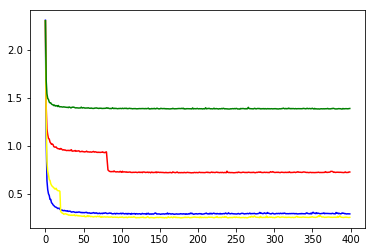

In [5]:
c = ['green', 'yellow', 'red', 'blue'][::-1]
for i,coor in enumerate(losses[4:]):
    plt.plot(np.arange(len(coor)), coor, color=c[i])

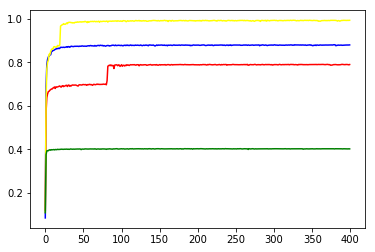

In [8]:
c = ['green', 'yellow', 'red', 'blue'][::-1]
for i,coor in enumerate(ac[4:]):
    plt.plot(np.arange(len(coor)), coor, color=c[i])